In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached protobuf-4.25.2-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached tensorboard-2.15.1-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
INFO: pip is looking at multiple versions of tensorflow-gpu to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [41 lines of output]
      Traceback (most recent call last):
        File "/home/murar/Documents/mainenv/lib/python3.10/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
        File "/home/murar/Documents/mainenv/lib/python3.10/site-packages/

In [2]:
import tensorflow as tf
import os

2024-01-23 12:34:41.623931: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-23 12:34:41.795805: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-23 12:34:41.798585: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-23 12:34:41.798595: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [3]:
# avoid OOM errors by setting gpu memory consumption Growth
gpus =tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
     

2024-01-23 12:34:43.652056: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-01-23 12:34:43.652412: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-23 12:34:43.652547: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2024-01-23 12:34:43.652610: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2024-01-23 12:34:43.652670: W tensorflow/c

In [4]:
import cv2,imghdr

In [5]:
data_dir="ImageClassification/data/"

In [6]:
image_exts=["jpeg","jpg","bmp","png"]

In [7]:
os.listdir(data_dir)

['happy', 'sad']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip= imghdr.what(image_path)
            if tip not in image_exts:
                print("ımage not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as  e:
            print("Issue with image {}".format(image_path))
            # os.remove(image_path)
            

In [9]:
# load data 
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [12]:
data=tf.keras.utils.image_dataset_from_directory(data_dir)

Found 246 files belonging to 2 classes.


2024-01-23 12:34:48.466464: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [14]:
data_iterator=data.as_numpy_iterator()

In [15]:
data_iterator

In [16]:
#get another batch
batch=data_iterator.next()

In [17]:
#class 1=sad
#class 0=happy
batch[1]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int32)

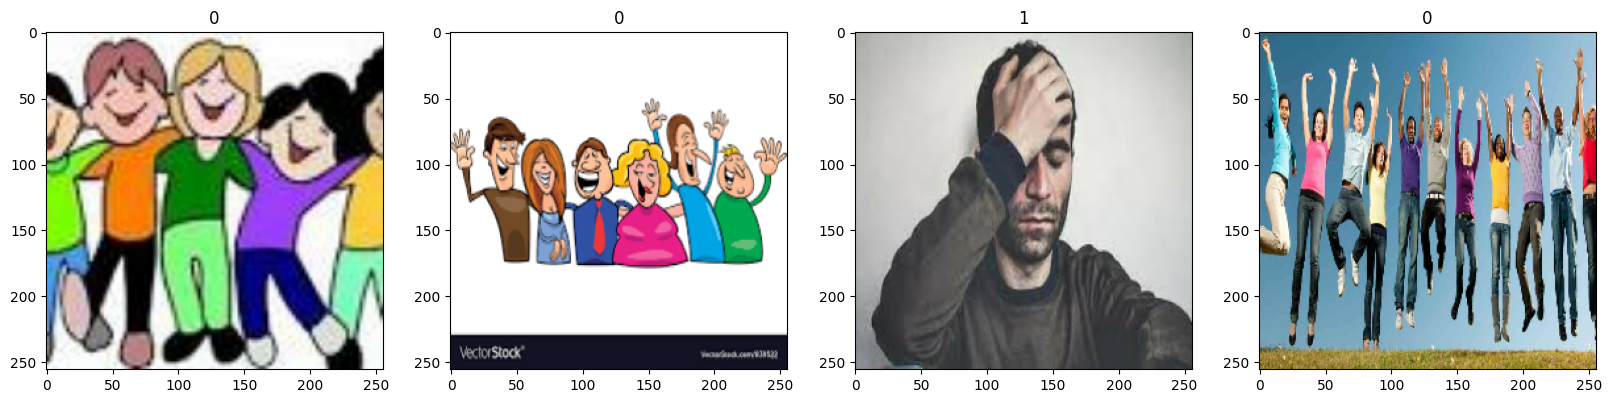

In [18]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
scaled=batch[0]/255

In [20]:
scaled.max()

1.0

# preprocessing data

### scale data


In [21]:
data=data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [22]:
scaled_iterator=data.as_numpy_iterator()

In [23]:
batch= scaled_iterator.next()

In [24]:
batch[0].max()

1.0

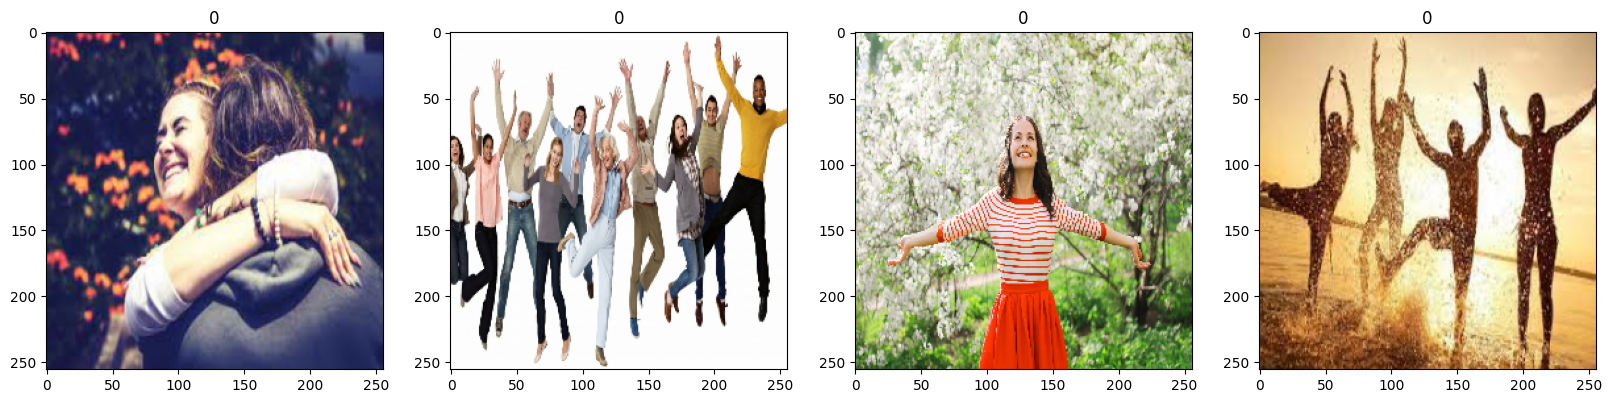

In [25]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# split data

In [26]:
len(data)

8

In [27]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [28]:
train_size,test_size,val_size

(5, 1, 2)

In [29]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [30]:
len(train),len(test),len(val)

(5, 1, 2)

# deep learning 

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [32]:
model=Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 6s 683ms/step - loss: 0.8606 - accuracy: 0.5375 - val_loss: 0.6654 - val_accuracy: 0.5781
Epoch 2/20
5/5 [==============================] - 4s 601ms/step - loss: 0.6841 - accuracy: 0.5625 - val_loss: 0.5744 - val_accuracy: 0.5938
Epoch 3/20
5/5 [==============================] - 4s 620ms/step - loss: 0.6195 - accuracy: 0.6313 - val_loss: 0.5340 - val_accuracy: 0.7031
Epoch 4/20
5/5 [==============================] - 4s 618ms/step - loss: 0.4888 - accuracy: 0.7625 - val_loss: 0.5316 - val_accuracy: 0.6875
Epoch 5/20
5/5 [==============================] - 4s 624ms/step - loss: 0.4547 - accuracy: 0.7563 - val_loss: 0.3607 - val_accuracy: 0.9062
Epoch 6/20
5/5 [==============================] - 4s 612ms/step - loss: 0.3917 - accuracy: 0.8875 - val_loss: 0.2861 - val_accuracy: 0.9375
Epoch 7/20
5/5 [==============================] - 4s 614ms/step - loss: 0.3656 - accuracy: 0.8500 - val_loss: 0.2960 - val_accuracy: 0.9219
Epoch 8/20
5/5 [====

# 8. Plot Performance

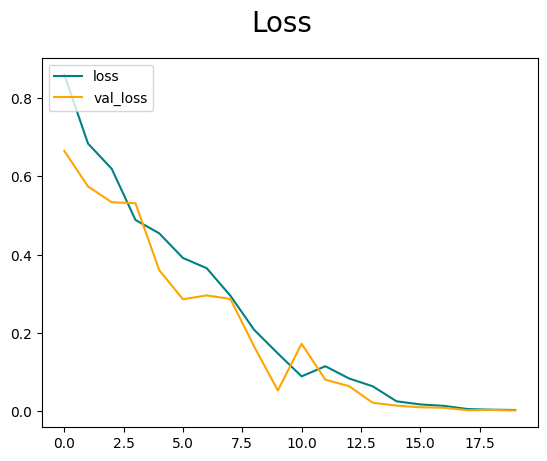

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

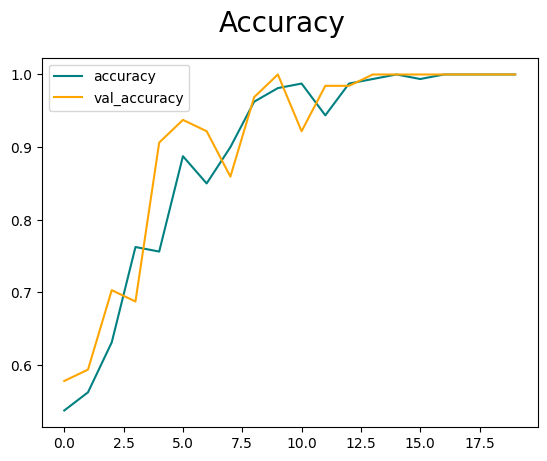

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [43]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 122ms/step


In [44]:
print(pre.result().numpy(), re.result().numpy(), acc.result().numpy())

1.0 1.0 1.0


# 10. Test

In [45]:
import cv2

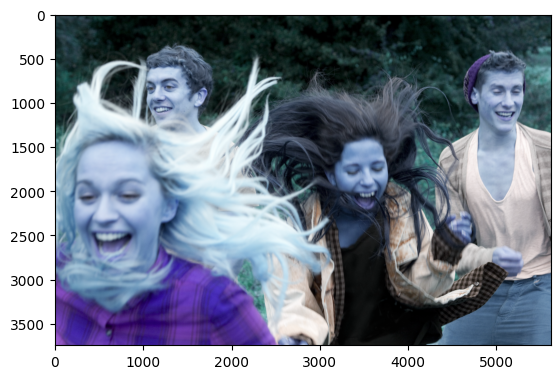

In [48]:
img = cv2.imread('happyPoeple.jpg')
plt.imshow(img)
plt.show()

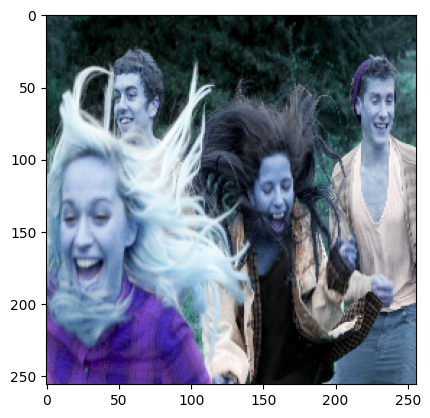

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 26ms/step


In [51]:
yhat

array([[0.08778643]], dtype=float32)

In [52]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [53]:
from tensorflow.keras.models import load_model

In [54]:
model.save(os.path.join('models','imageclassifier.h5'))

In [55]:
new_model = load_model('models/imageclassifier.h5')

In [56]:
y_pred=new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 60ms/step


In [57]:
y_pred

array([[0.08778643]], dtype=float32)

In [58]:
if y_pred > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# web cam

In [ ]:
cap=cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame=cap.read()
    resize = tf.image.resize(frame, (256,256))
    
    y_pred=new_model.predict(np.expand_dims(resize/255, 0))
    
    if y_pred > 0.5: 
        print(f'Predicted class is Sad')
        cv2.putText(frame,"this is sad face",(10,50),cv2.FONT_HERSHEY_SIMPLEX,2,(0,0,255),2)
    else:
        cv2.putText(frame,"this is happy face",(10,50),cv2.FONT_HERSHEY_SIMPLEX,2,(255,0,0),2)
        print(f'Predicted class is Happy')
    
    
    cv2.imshow("pred",frame)
    if cv2.waitKey(1) & 0xFF ==ord("q"):break
cap.release()
cv2.destroyAllWindows()